### TFS Assignment 2 - Unsupervised Learning



Name : Rahul Vanjeri

Intership batch: June 2021

In [74]:
#import required modules 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
import numpy as np , pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install gdown
!gdown https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
sns.set()

Downloading...
From: https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 3.54MB/s]


In [8]:
# Load Iris data set

df = pd.read_csv('/content/Iris.csv')

**EDA**

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [42]:
df[df.columns[1:5]][df['Species']== 'Iris-setosa'].mean().index

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

No null values in columns moving on to the next step

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class counts')

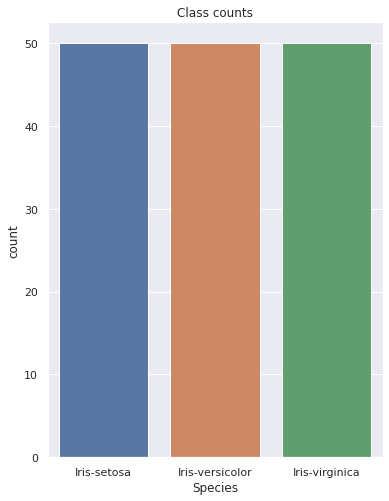

In [73]:
#class counts
plt.figure(figsize=(6,8))
sns.countplot(df['Species'])
plt.title('Class counts')

Text(0.5, 1.0, 'Iris-virginica')

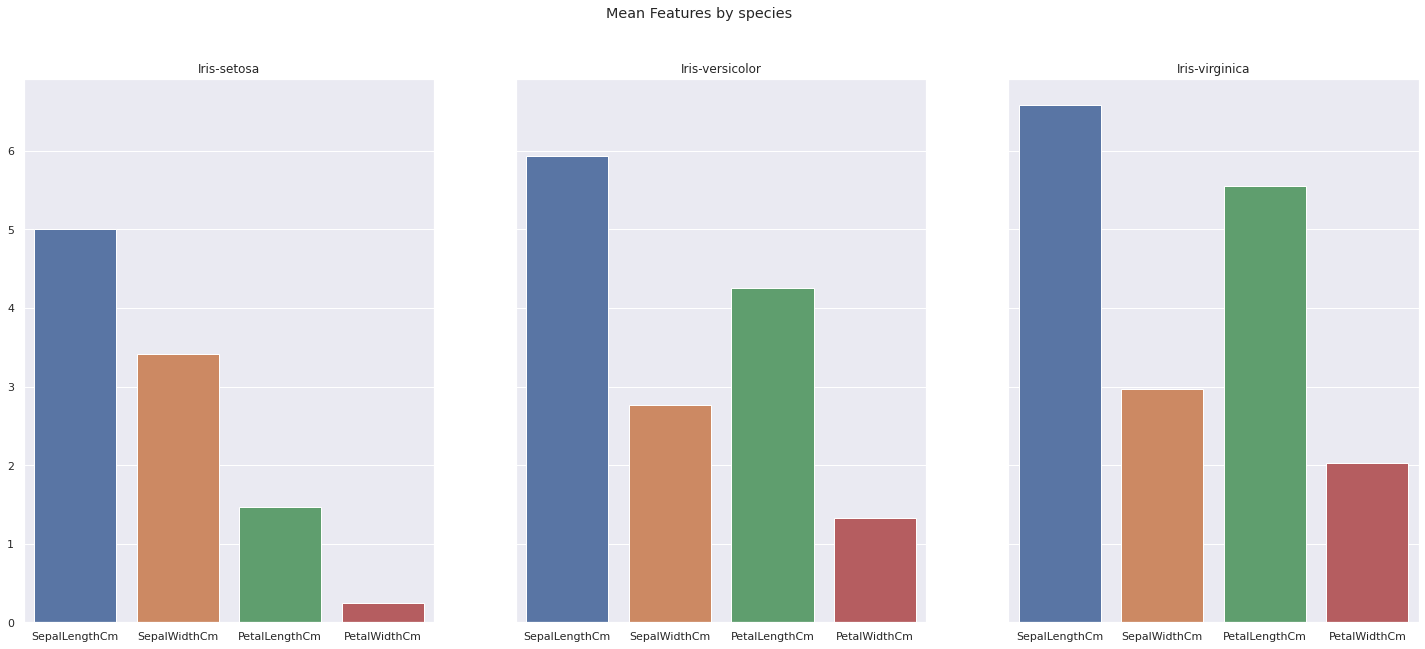

<Figure size 648x288 with 0 Axes>

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
plt.figure(figsize= [9,4])
fig.suptitle('Mean Features by species')
sns.barplot(ax=axes[0], x=df[df.columns[1:5]][df['Species']== 'Iris-setosa'].mean().index, y=df[df.columns[1:5]][df['Species']== 'Iris-setosa'].mean().values)
axes[0].set_title('Iris-setosa')

sns.barplot(ax=axes[1], x=df[df.columns[1:5]][df['Species']== 'Iris-versicolor'].mean().index, y=df[df.columns[1:5]][df['Species']== 'Iris-versicolor'].mean().values)
axes[1].set_title('Iris-versicolor')

sns.barplot(ax=axes[2], x=df[df.columns[1:5]][df['Species']== 'Iris-virginica'].mean().index, y=df[df.columns[1:5]][df['Species']== 'Iris-virginica'].mean().values)
axes[2].set_title('Iris-virginica')


Significant Difference in the distribution of feature mean is seen by class

**Observe Box plots to check distribution**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


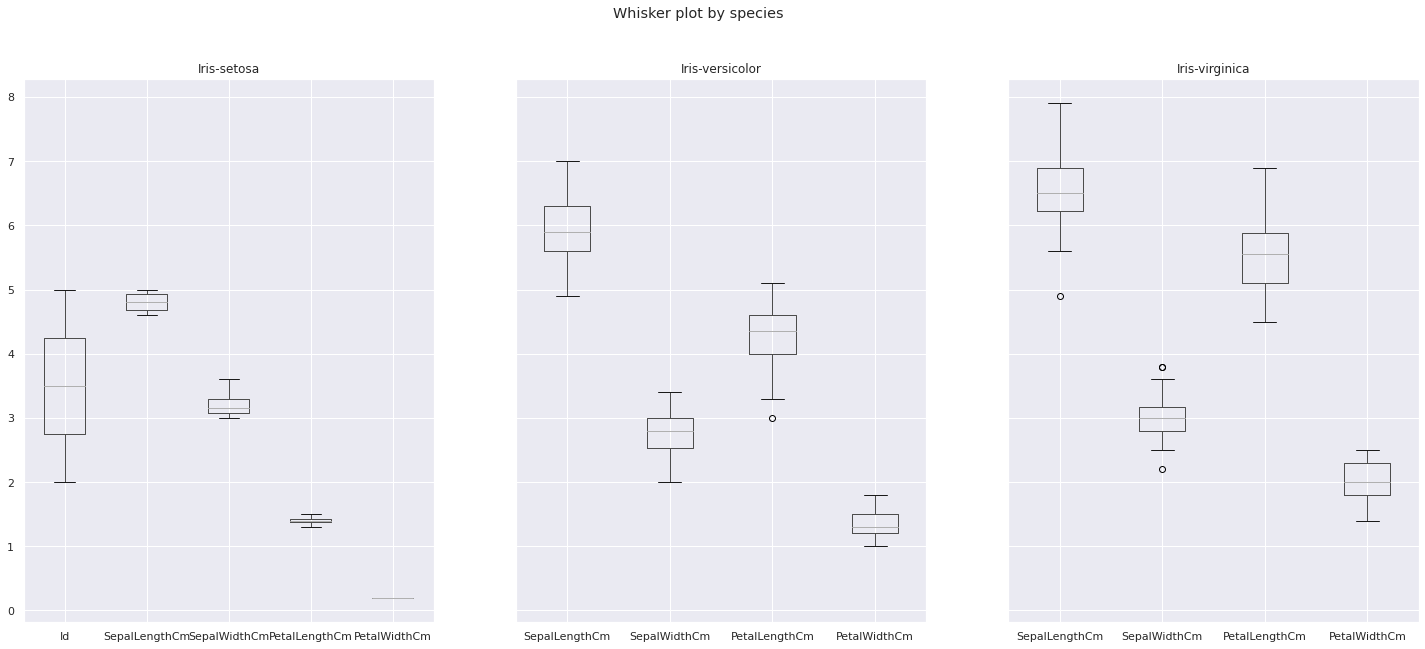

<Figure size 648x288 with 0 Axes>

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
plt.figure(figsize= [9,4])
df1 = df[1:5][df['Species'] ==  'Iris-setosa']
fig.suptitle('Whisker plot by species')
df1.boxplot(ax=axes[0])
axes[0].set_title('Iris-setosa')

df2 = df[df.columns[1:5]][df['Species']== 'Iris-versicolor']
df2.boxplot(ax=axes[1])
axes[1].set_title('Iris-versicolor')

df3 = df[df.columns[1:5]][df['Species']== 'Iris-virginica']
df3.boxplot(ax=axes[2])
axes[2].set_title('Iris-virginica')

plt.show()

Check Pair plots to see distribution

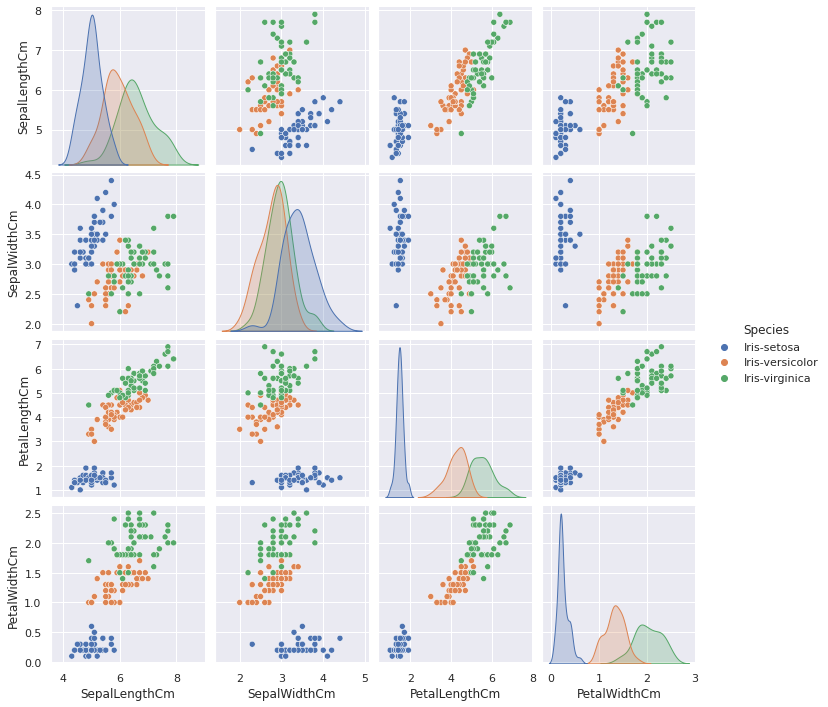

In [56]:
sns.pairplot(data=df[df.columns[1:]], hue='Species')

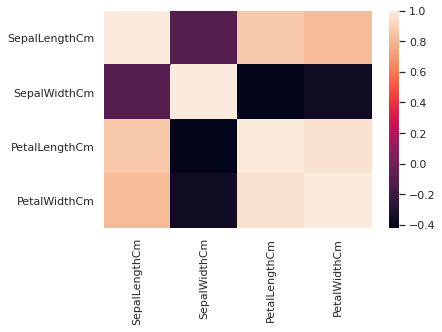

In [101]:
sns.heatmap(df[df.columns[1:]].corr())

PetalWidth and Sepal Length are highly correlated. where as Petallength and Sepal width are negatively correlated as well as petal width and sepal width

In [91]:
#Normalise the data
X = df[df.columns[1:5]]
Y = df[df.columns[-1]]
Y[Y== 'Iris-setosa'] = 0 
Y[Y== 'Iris-versicolor'] = 1 
Y[Y == 'Iris-virginica'] = 2
X_normalized = scaler.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# build PCA object and transform to normalized scale

pca = PCA(n_components = 3). fit(X_normalized)

X_pca = pca.transform(X_normalized)

In [93]:
# View the shape of data

print(X.shape, X_pca.shape)


(150, 4) (150, 3)


In [94]:
# View the  pca components( transformed values and the direction of variables correlation and the role they play in significance)

print(pca.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]]


In [95]:
# Variance ratio or eigen values of 3 components
# the first 2 eigen values retain a cumulative of nearly 96% of variance of data
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832]


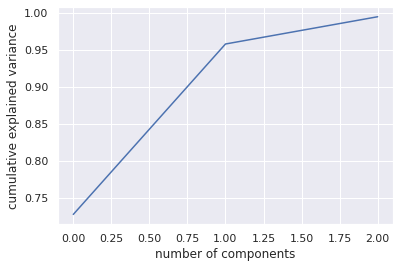

In [96]:
# PLot cumulative variance of the components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

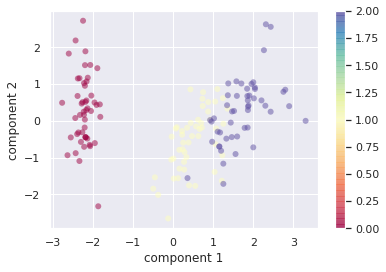

In [97]:
# component 1 and 2 analysis via visualization

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Clustering

In [128]:
# Import required packages and modules
from sklearn.cluster import KMeans



In [129]:
# Assign the variables
Y
X_normalized

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [130]:
# Create K-means object of 4 clusters, n_init=10 (centroid replacement), iter=50(shuffle data)

kmeans = KMeans(n_clusters = 3, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(X)


In [131]:
#Predict the model

labels=kmeans.predict(X)


In [132]:
# View the labels

kmeans_labels = kmeans.labels_

print(labels) # K-means labels

#print(kmeans_labels) 



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


##### When you are not certain of the number of cluster or labels then attempt for loop as follows to analyse the elbow-method:

In [133]:

w=[]
for i in range(1,7):
    kmeans = KMeans(n_clusters = i, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(X)
    labels=kmeans.predict(X)
    kmeans_labels = kmeans.labels_
    w.append(kmeans.inertia_)
print(labels)
#print(kmeans_labels)
# inertia is the sum of squared distance of samples to their closest cluster center

[4 0 0 0 4 4 0 0 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 4 4 4 0 0 4 4 4 0 0 4
 0 0 4 4 0 0 4 4 0 4 0 4 0 5 5 5 3 5 5 5 3 5 3 3 5 3 5 3 5 5 3 5 3 5 3 5 5
 5 5 5 5 5 3 3 3 3 5 3 5 5 5 3 3 3 5 3 3 3 3 3 5 3 3 1 5 2 1 1 2 3 2 1 2 1
 1 1 5 1 1 1 2 2 5 1 5 2 5 1 2 5 5 1 2 2 2 1 5 5 2 1 1 5 1 1 1 5 1 1 1 5 1
 1 5]


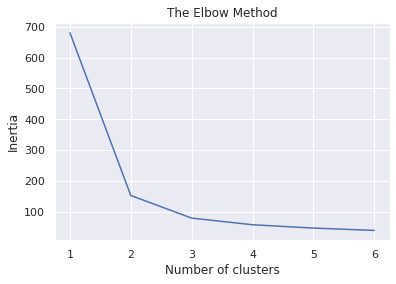

In [134]:
plt.plot(range(1,7),w)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

here we see two possible options of 3 clusteers or 4 clusters

Compute silhouette score to re affirm 3 clusters

[1 6 6 6 1 1 6 1 6 6 1 6 6 6 1 1 1 1 1 1 1 1 6 1 6 6 1 1 1 6 6 1 1 1 6 6 1
 6 6 1 1 6 6 1 1 6 1 6 1 6 5 5 5 2 5 2 5 2 5 2 2 2 2 5 2 5 2 2 5 2 3 2 3 5
 5 5 5 5 5 2 2 2 2 3 2 5 5 5 2 2 2 5 2 2 2 2 2 5 2 2 4 3 0 4 4 0 2 0 4 0 4
 3 4 3 3 4 4 0 0 3 4 3 0 3 4 0 3 3 4 0 0 0 4 3 3 0 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]


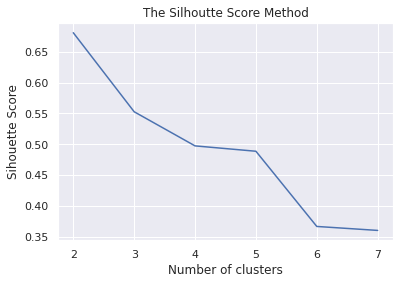

In [135]:
from sklearn.metrics import silhouette_score
w=[]
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, init='k-means++',n_init=10,max_iter=50, random_state = 0).fit(X)
    labels=kmeans.predict(X)
    kmeans_labels = kmeans.labels_
    w.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean'))
print(labels)

plt.plot(range(2,8),w)
plt.title('The Silhoutte Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sihouette Score')
plt.show()

The Silhouette Score for 3 clusters is > that for 4 clusters thus our choice of clusters is 3

Heirarchial Clustering for visualization

In [136]:
import scipy.cluster.hierarchy as hca
from sklearn.cluster import AgglomerativeClustering

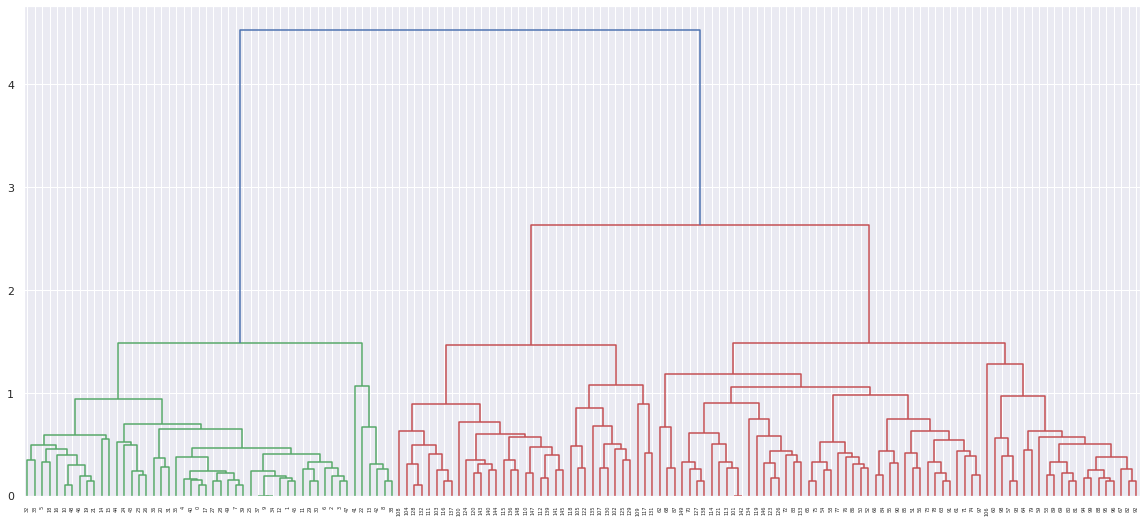

In [137]:
#using 3 clusters
plt.figure(figsize=(20,9))
dendrogram=hca.dendrogram(hca.linkage(X,method='weighted'))

As seen in the plot a cluster number of 3 is the optimal number
